# Project Review 1 Notebook
This notebook assumes the data is either obtained locally or avaiable online in your drive. The `drive` variable decides the location of the data. If not avaiable locally  this will mount your google drive in the notebook's local drive. Keep in mind this requires this notebook to be running in Google Colab.

If running locally(`drive = False`) then data must be present in `data` directory relative to the notebook. You can change the location accordingly in the notebook.


In [ ]:
drive = False
data_location = None

In [ ]:
if drive:
  from google.colab import drive
  drive.mount('/content/drive')
  data_location = '/content/drive/MyDrive/data'
else:
  data_location = 'data'

Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
train_data_generator = keras.preprocessing.image.ImageDataGenerator(rotation_range=0.3 , zoom_range=0.2 , rescale=1/255 , horizontal_flip=True , vertical_flip=True , validation_split=0.2)

In [ ]:
test_data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3) , input_shape=(800 , 600 , 3) , activation='relu'))

In [ ]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu'))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(25 , activation='relu'))

In [ ]:
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 798, 598, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 399, 299, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 397, 297, 32)      18464     
                                                                 
 flatten (Flatten)           (None, 3773088)           0         
                                                                 
 dense (Dense)               (None, 25)                94327225  
                                                                 
 dense_1 (Dense)             (None, 2)                 52        
                                                        

In [ ]:
train_generator = train_data_generator.flow_from_directory(
    'drive/MyDrive/data',
    subset='training',
    target_size=(800 , 600 ),
    batch_size=12,
    class_mode='binary')

Found 128 images belonging to 2 classes.


In [ ]:
test_generator = test_data_generator.flow_from_directory(
    'drive/MyDrive/data',
    subset='validation',
    target_size=(800, 600 ),
    batch_size=12,
    class_mode = 'binary'
)
    

Found 30 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator , validation_data = test_generator , epochs = 10)

Epoch 1/10
11/11 [==============================] - 121s 10s/step - loss: 4.7322 - acc: 0.7109 - val_loss: 26.9924 - val_acc: 0.9333
Epoch 2/10
11/11 [==============================] - 20s 2s/step - loss: 0.4917 - acc: 0.7734 - val_loss: 7.0809 - val_acc: 0.9333
Epoch 3/10
11/11 [==============================] - 20s 2s/step - loss: 0.3358 - acc: 0.8516 - val_loss: 40.1697 - val_acc: 0.9333
Epoch 4/10
11/11 [==============================] - 20s 2s/step - loss: 0.3604 - acc: 0.8438 - val_loss: 64.4004 - val_acc: 0.9333
Epoch 5/10
11/11 [==============================] - 20s 2s/step - loss: 0.3222 - acc: 0.8438 - val_loss: 67.1961 - val_acc: 0.9333
Epoch 6/10
11/11 [==============================] - 20s 2s/step - loss: 0.3461 - acc: 0.8281 - val_loss: 102.2618 - val_acc: 0.9333
Epoch 7/10
11/11 [==============================] - 20s 2s/step - loss: 0.2662 - acc: 0.8828 - val_loss: 40.3140 - val_acc: 0.9333
Epoch 8/10
11/11 [==============================] - 20s 2s/step - loss: 0.2851 - 

In [ ]:
import matplotlib.pyplot as plt

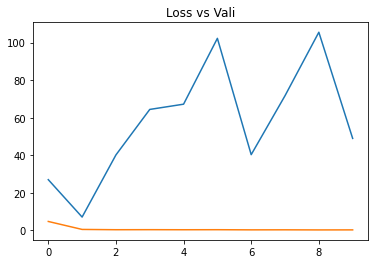

In [ ]:
plt.plot(list(range(10)) , history.history['val_loss'])
plt.plot(list(range(10)) , history.history['loss'])
plt.title("Training vs Validation Loss")
plt.legend()
plt.savefig('loss_graph.png' , format='png')

In [ ]:

plt.plot(list(range(10)) , history.history['val_acc'])
plt.plot(list(range(10)) , history.history['acc'])
plt.title('Training vs Validation accuracy')
plt.legend()
plt.savefig('acc_graph.png' , format='png')

In [ ]:
model.save('model')